## Feature exploration

@LaurentMombaerts
@VladimirLevin

In [1]:
%reset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import time
import seaborn as sns

# Parallel Computing
from joblib import Parallel, delayed

# ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import GroupShuffleSplit

# Maths
from scipy.interpolate import interp1d
# from arch import arch_model

# Paths tricks
import os
from pathlib import Path

df_features = pd.read_parquet('df_features_train.parquet') 
# df_features = pd.read_parquet('~/data/df_features_train.parquet') 

In [5]:
df_features

,wap_sum,wap_mean,wap_std,wap2_sum,wap2_mean,wap2_std,wap3_sum,wap3_mean,wap3_std,wap4_sum,...,trade_size_sum_120,trade_order_count_sum_120,trade_order_count_mean_120,trade_roll_measure_120,trade_roll_impact_120,trade_mkt_impact_120,trade_amihud_120,trade_traded_volume_120,trade_avg_trade_size_120,vpin
0,303.125061,1.003725,0.000693,303.105539,1.003661,0.000781,303.146936,1.003798,0.000652,303.134863,...,2411.0,82.0,2.411765,0.000204,6.382619e-08,3.394071e-06,4.216972e-07,3190.139181,28.900000,0.923509
1,200.047768,1.000239,0.000262,200.041171,1.000206,0.000272,200.040851,1.000204,0.000278,200.035611,...,1174.0,50.0,2.000000,0.000463,3.589880e-07,5.943633e-06,6.228642e-07,1289.353432,22.614035,0.825187
2,187.913849,0.999542,0.000864,187.939824,0.999680,0.000862,187.897375,0.999454,0.000779,187.923063,...,2024.0,60.0,2.857143,0.000407,1.886683e-07,3.891099e-06,1.175237e-06,2158.608928,31.779412,0.995675
3,119.859781,0.998832,0.000757,119.835941,0.998633,0.000656,119.884240,0.999035,0.000733,119.870163,...,1631.0,50.0,4.545455,0.000738,3.764258e-07,3.631721e-06,1.152450e-06,1959.605547,33.254237,0.966280
4,175.932865,0.999619,0.000258,175.934256,0.999626,0.000317,175.912533,0.999503,0.000312,175.928283,...,1574.0,75.0,4.166667,0.000362,2.023833e-07,2.770568e-06,1.531391e-07,1790.254496,20.123596,0.924680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428927,309.870466,0.999582,0.000486,309.871372,0.999585,0.000613,309.812308,0.999395,0.000594,309.778634,...,1432.0,63.0,2.172414,0.000244,9.479032e-08,4.542918e-06,4.704802e-07,2568.838117,24.951456,0.886608
428928,223.552143,1.002476,0.001264,223.580314,1.002602,0.001303,223.480899,1.002156,0.001341,223.505486,...,1781.0,107.0,3.057143,0.000497,2.134959e-07,5.329830e-06,2.091255e-06,2327.828627,15.802721,0.785283
428929,256.277050,1.001082,0.000466,256.255056,1.000996,0.000599,256.168899,1.000660,0.000558,256.146066,...,3631.0,92.0,2.875000,0.000776,2.072699e-07,3.641015e-06,3.455508e-07,3742.254714,38.163265,0.857006
428930,399.721736,1.001809,0.000456,399.714332,1.001790,0.000507,399.779362,1.001953,0.000429,399.775385,...,8090.0,194.0,2.852941,0.000184,1.950722e-08,1.610208e-06,2.399811e-08,9406.795437,40.123932,0.860831


In [6]:
df_features.describe()

,wap_sum,wap_mean,wap_std,wap2_sum,wap2_mean,wap2_std,wap3_sum,wap3_mean,wap3_std,wap4_sum,...,trade_size_sum_120,trade_order_count_sum_120,trade_order_count_mean_120,trade_roll_measure_120,trade_roll_impact_120,trade_mkt_impact_120,trade_amihud_120,trade_traded_volume_120,trade_avg_trade_size_120,vpin
count,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,428932.000000,...,4.289320e+05,428932.000000,428932.000000,428932.000000,4.289320e+05,4.289320e+05,4.289320e+05,4.289320e+05,428932.000000,428932.000000
mean,389.927917,1.000003,0.001110,389.927668,1.000002,0.001149,389.930531,1.000012,0.001123,389.929400,...,2.506191e+04,294.629885,3.761395,0.000345,1.376881e-07,2.589431e-06,3.416208e-07,3.185232e+04,69.129207,0.896607
std,135.835208,0.003370,0.001052,135.835473,0.003374,0.001065,135.834548,0.003347,0.001062,135.835030,...,5.514350e+04,478.682638,1.725130,0.000439,3.353242e-06,7.972853e-06,1.204868e-06,7.025336e+04,85.639863,0.065605
min,24.002597,0.917331,0.000016,24.001007,0.917300,0.000001,23.994225,0.917382,0.000001,23.992069,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,275.410780,0.998840,0.000509,275.414364,0.998837,0.000540,275.399051,0.998862,0.000515,275.398083,...,3.895000e+03,97.000000,2.770115,0.000130,5.107885e-09,6.262014e-07,3.416884e-08,4.997310e+03,36.846792,0.861887
50%,387.714477,1.000012,0.000807,387.711657,1.000012,0.000842,387.712507,1.000017,0.000815,387.716196,...,9.131000e+03,169.000000,3.402299,0.000227,1.781104e-08,1.408337e-06,1.071317e-07,1.160981e+04,53.716528,0.904116
75%,511.600147,1.001165,0.001335,511.605598,1.001167,0.001378,511.605991,1.001157,0.001350,511.603444,...,2.318925e+04,314.000000,4.290323,0.000406,6.472440e-08,2.908329e-06,3.114920e-07,2.942038e+04,77.037124,0.942075
max,634.409836,1.079311,0.034370,634.419569,1.079403,0.034406,634.357009,1.079072,0.034426,634.336999,...,2.981836e+06,37992.000000,107.000000,0.029832,1.085519e-03,2.240777e-03,3.099790e-04,4.158027e+06,9558.000000,1.000000


In [7]:
corr_mat = df_features.corr() # row_id removed because it is character type
corr_mat

,wap_sum,wap_mean,wap_std,wap2_sum,wap2_mean,wap2_std,wap3_sum,wap3_mean,wap3_std,wap4_sum,...,trade_size_sum_120,trade_order_count_sum_120,trade_order_count_mean_120,trade_roll_measure_120,trade_roll_impact_120,trade_mkt_impact_120,trade_amihud_120,trade_traded_volume_120,trade_avg_trade_size_120,vpin
wap_sum,1.000000,0.003728,0.099949,1.000000,0.004015,0.077063,1.000000,0.002239,0.085210,1.000000,...,0.446860,0.467021,0.192012,-0.318050,-0.050773,-0.222274,-0.236440,0.438289,0.310234,0.005159
wap_mean,0.003728,1.000000,-0.021825,0.003731,0.999366,-0.020800,0.003660,0.998136,-0.022041,0.003675,...,-0.003099,-0.014437,-0.014045,0.003515,0.000633,-0.003331,-0.004443,0.004187,0.003562,-0.007943
wap_std,0.099949,-0.021825,1.000000,0.099943,-0.022483,0.995862,0.099978,-0.018732,0.993569,0.099966,...,0.232081,0.264363,0.209262,0.247038,0.000762,0.060730,0.118930,0.202235,0.028183,-0.058541
wap2_sum,1.000000,0.003731,0.099943,1.000000,0.004027,0.077057,1.000000,0.002238,0.085205,1.000000,...,0.446862,0.467019,0.192016,-0.318051,-0.050772,-0.222274,-0.236441,0.438292,0.310244,0.005163
wap2_mean,0.004015,0.999366,-0.022483,0.004027,1.000000,-0.021466,0.003942,0.996889,-0.022670,0.003965,...,-0.002784,-0.014390,-0.013614,0.003284,0.000774,-0.003442,-0.004669,0.004558,0.004560,-0.007514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trade_mkt_impact_120,-0.222274,-0.003331,0.060730,-0.222274,-0.003442,0.072654,-0.222265,-0.001515,0.069209,-0.222266,...,-0.104846,-0.105645,-0.085114,0.316577,0.573031,1.000000,0.567057,-0.107383,-0.124870,-0.033399
trade_amihud_120,-0.236440,-0.004443,0.118930,-0.236441,-0.004669,0.130054,-0.236433,-0.002799,0.125609,-0.236435,...,-0.100919,-0.105367,-0.069470,0.240007,0.401963,0.567057,1.000000,-0.101924,-0.116726,-0.023421
trade_traded_volume_120,0.438289,0.004187,0.202235,0.438292,0.004558,0.193727,0.438286,0.003352,0.193686,0.438289,...,0.924301,0.830926,0.509865,-0.097696,-0.017151,-0.107383,-0.101924,1.000000,0.415354,0.094735
trade_avg_trade_size_120,0.310234,0.003562,0.028183,0.310244,0.004560,0.033029,0.310220,0.001888,0.015719,0.310231,...,0.387531,0.115692,0.388199,0.016688,-0.021407,-0.124870,-0.116726,0.415354,1.000000,0.195668


<AxesSubplot:>

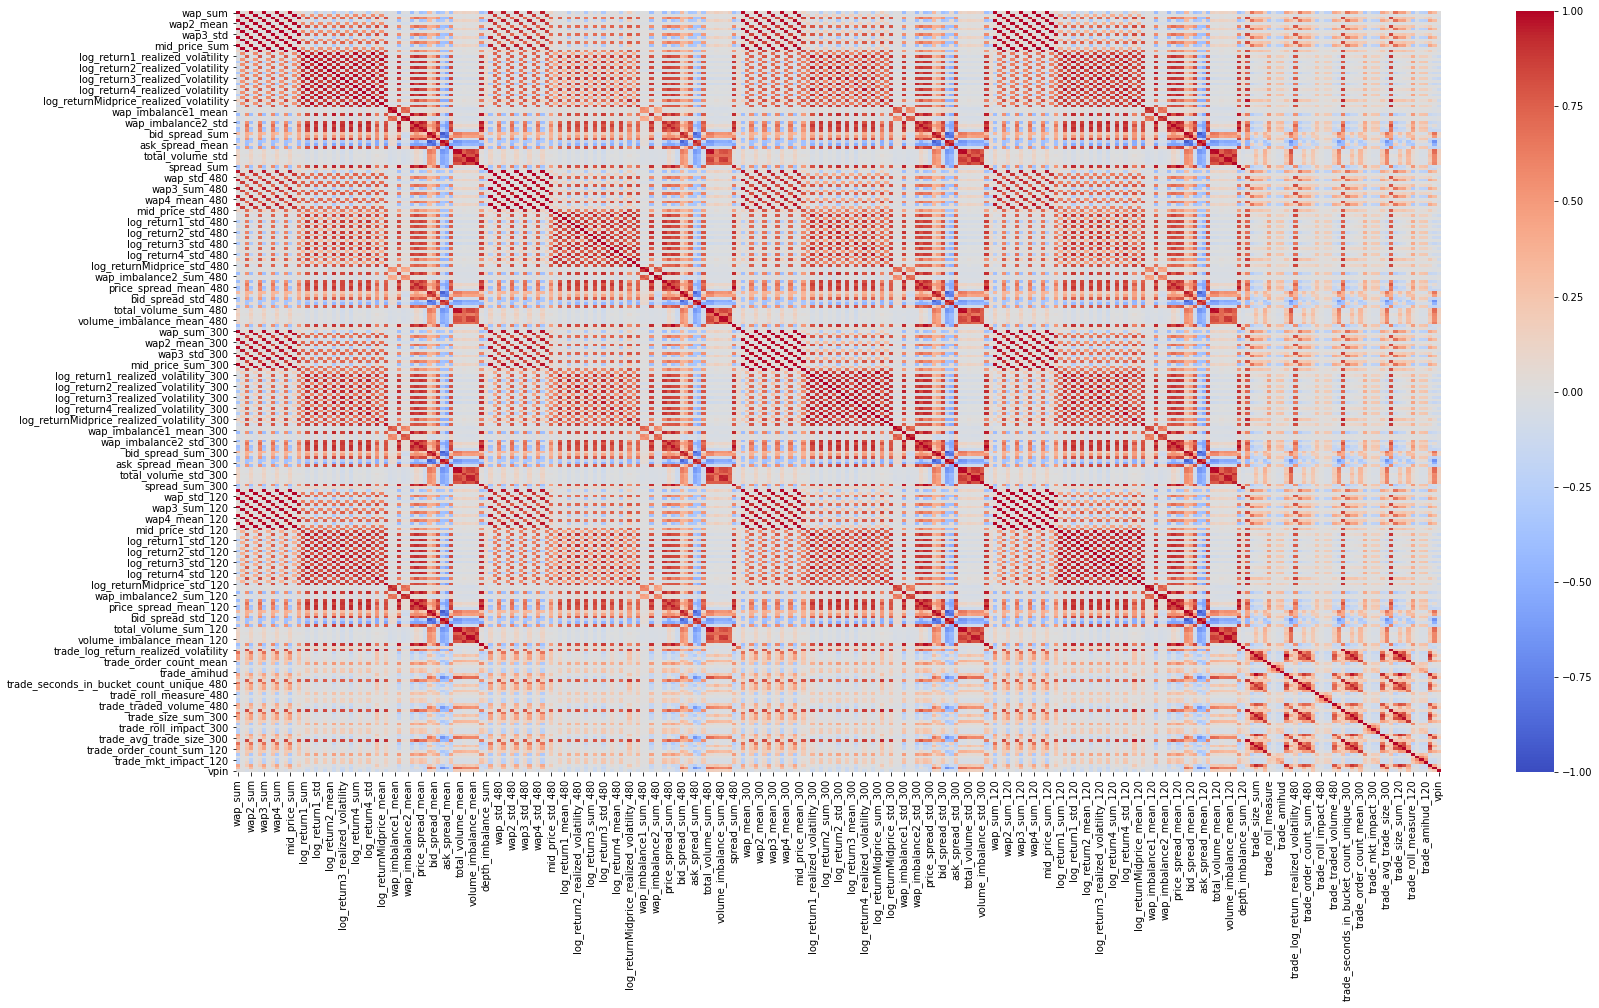

In [8]:
plt.figure(figsize=(27,14))
sns.heatmap(corr_mat, annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [27]:
all_idx = np.where(corr_mat > 0.99) 

In [28]:
# all_idx = np.where(corr_mat == 1) 
x = all_idx[0]
y = all_idx[1]

In [29]:
for i in range(len(x)):
    xi_col = df_features.columns[x[i]]
    yi_col = df_features.columns[y[i]]
    if x[i] != y[i]:
        print('Correlation above .99 between : ', xi_col, 'and', yi_col)

Correlation above .99 between :  wap_sum and wap2_sum
Correlation above .99 between :  wap_sum and wap3_sum
Correlation above .99 between :  wap_sum and wap4_sum
Correlation above .99 between :  wap_sum and mid_price_sum
Correlation above .99 between :  wap_sum and wap_sum_120
Correlation above .99 between :  wap_sum and wap2_sum_120
Correlation above .99 between :  wap_sum and wap3_sum_120
Correlation above .99 between :  wap_sum and wap4_sum_120
Correlation above .99 between :  wap_sum and mid_price_sum_120
Correlation above .99 between :  wap_mean and wap2_mean
Correlation above .99 between :  wap_mean and wap3_mean
Correlation above .99 between :  wap_mean and wap4_mean
Correlation above .99 between :  wap_mean and mid_price_mean
Correlation above .99 between :  wap_mean and wap_mean_120
Correlation above .99 between :  wap_mean and wap2_mean_120
Correlation above .99 between :  wap_mean and wap3_mean_120
Correlation above .99 between :  wap_mean and wap4_mean_120
Correlation above